<h1>Importing the libraries necessary for this project</h1>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)

<h3>Loading the dataset</h3>
<ul>
    <li>Definining the dataset as dataframe</li>
    <li>Displaying few rows of the dataframe to verify is loads correctly</li>
</ul>


In [9]:
file_path = "C:/Users/Erick/Downloads/spambase_v6.csv"
df = pd.read_csv(file_path)
df.head(5)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0,0,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


<h6>Removing first column called unnamed</h6>

In [11]:
df.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

<h6>Transforming string input to numeric because on this model we need to set as numbers although is spam row will get boolean values </h6>

In [13]:
df = df.apply(pd.to_numeric, errors='coerce')

<h6>Filling the missing value assign them to zero</h6>

In [15]:
df.fillna(0,inplace=True)

<h3>Exploratory Data Analysis</h3>

<p>Perfoming EDA is used to analyse and invistigate data sets, originally develop by the mathematician John Tukey in 1970, the reason being is that helps how to use the resource more directly, for this project we have drop few row that was irrelevant and to handle missing value or different formart that should be in order to be more precise.</p>

In [18]:
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_repor

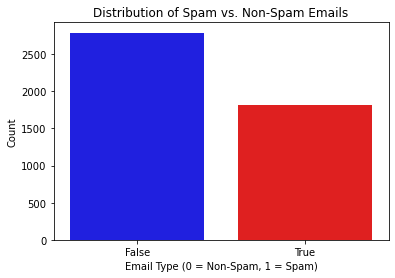

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["is_spam"], palette=["blue", "red"])
plt.title("Distribution of Spam vs. Non-Spam Emails")
plt.xlabel("Email Type (0 = Non-Spam, 1 = Spam)")
plt.ylabel("Count")
plt.show()


Statistical Summary:
       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min     

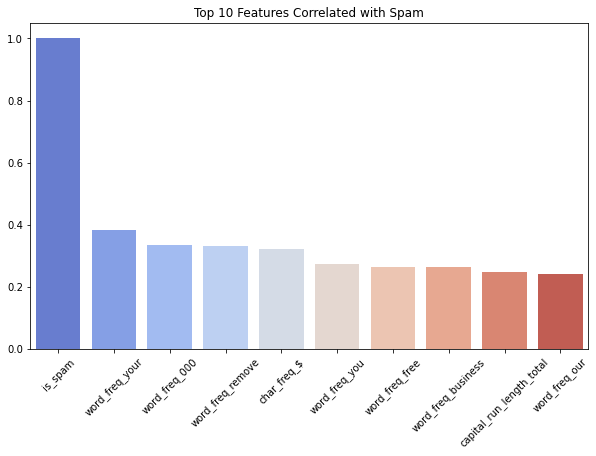

In [20]:
print("\nStatistical Summary:")
print(df.describe())
correlation = df.corr()["is_spam"].sort_values(ascending=False)
print("\nTop 10 correlated features with Spam:")
print(correlation.head(11))
plt.figure(figsize=(10,6))
sns.barplot(x=correlation.index[:10], y=correlation.values[:10], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Features Correlated with Spam")
plt.show()

<p>All the data was formated, we cleaned duplicate values or missing values using some of the function that you can see above, drop method was used to remove row that is irrelevant for this dataset. We will use two classification algorithm one of them is Radom Forest Classifier which consists of a large number of threes. These tree predicts a value for probability with that we can get the final output, one of the advantage of this algorithm its more efficient on large dataset.</p>

<p>The other one is Support Vector Machine which utilizes support vector enlarging the feature variable space using functions called kernels. Some of the advantage is makes training the dataset easy. These two algorithm works well with this dataset because the multiple decision tree therefore the forest and  reduces overlifting. Another factor to be considerated its allows to grow to the most considerable lenght possible which in this case helps more room for improvement. Handwritten character recognition is one application for SVM algorithm which in our case will be evaluating if the email is or not a spam because in a big company they employees would have their own digital signature, that is another way for security purpose of detecting spam.</p>

In [23]:
X = df.drop(columns=['is_spam']) 
y = df['is_spam'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h3>Random Forest Classifier</h3>

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [26]:
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       531
        True       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921

Confusion Matrix:
[[522   9]
 [ 32 358]]
Accuracy: 0.9554831704668838


<h3>Support Vector Machine</h3>

In [28]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [29]:
print("\nSupport Vector Machine (SVM) Performance:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Support Vector Machine (SVM) Performance:
              precision    recall  f1-score   support

       False       0.88      0.95      0.92       531
        True       0.93      0.83      0.87       390

    accuracy                           0.90       921
   macro avg       0.91      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921

Confusion Matrix:
[[507  24]
 [ 68 322]]
Accuracy: 0.9001085776330076


<h3>Receiver Operating Characteristic (ROC) </h3>

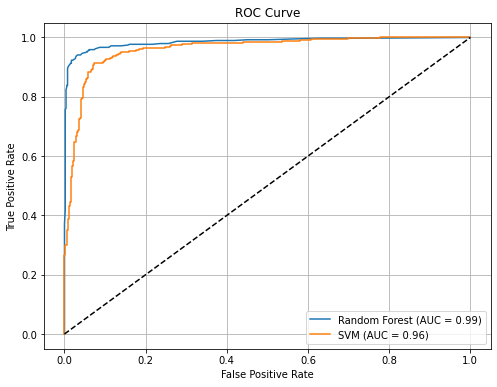

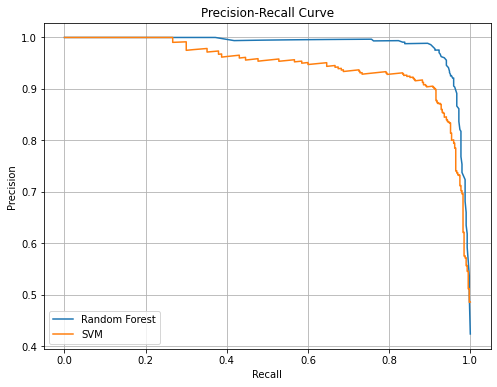

In [31]:

rf_probs = rf_model.predict_proba(X_test)[:,1]
svm_probs = svm_model.predict_proba(X_test)[:,1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_probs)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm_probs)

plt.figure(figsize=(8,6))
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_svm, precision_svm, label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

<h1>References:</h1>

<ul>
    <li><a href="https://www.datacamp.com/tutorial/markdown-in-jupyter-notebook">Jupyter Notebook</a>
    </li>
    <li><a href="https://pmc.ncbi.nlm.nih.gov/articles/PMC3668100/">Handling Missing data</a>
    </li>
     <li><a href="https://www.ibm.com/think/topics/exploratory-data-analysis">EDA</a>
    </li>
      <li><a href="https://www.projectpro.io/article/7-types-of-classification-algorithms-in-machine-learning/435">Classification Algorithm</a>
    </li>
</ul>
